# Task 1
### Data preparation and customer analytics
### Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

In [241]:
#import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
#load the datasets
purchase=pd.read_csv('QVI_purchase_behaviour.csv')
transaction=pd.read_excel('QVI_transaction_data.xlsx')

In [243]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [244]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [245]:
print(purchase.shape)
print(transaction.shape)

(72637, 3)
(264836, 8)


In [246]:
#checking for missing values
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [247]:
#checking for missing values
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

### no missing values

In [248]:
#checking to see if the data types are in the right format
purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [249]:
#checking to see if the data types are in the right format
transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [250]:
#looks like this in in the wrong format
transaction['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [251]:
#converted to object
transaction['PROD_QTY']=transaction['PROD_QTY'].astype('object')

### data types looks better now

In [252]:
purchase.head(1)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium


In [253]:
#checking for duplicate values-None
purchase.duplicated().sum()

0

In [254]:
#checking for duplicate values-1 of them
transaction.duplicated().sum()

1

In [255]:
transaction[transaction.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [256]:
#dropping the duplicated value
transaction=transaction.drop_duplicates()

In [257]:
#confirm to see if its been dropped
transaction.duplicated().sum()

0

### no duplicate values

In [258]:
#convert the column names to lower case for consistency and easy access
purchase.columns=purchase.columns.str.strip().str.lower()

In [259]:
#convert the column names to lower case for consistency and easy access
transaction.columns= transaction.columns.str.strip().str.lower()

In [260]:
purchase.head(2)

,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


In [261]:
transaction.head(2)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [262]:
#check the statistics of the numerical columns- something is wrong
purchase.describe()

,lylty_card_nbr
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [263]:
#corrected
purchase['lylty_card_nbr']=purchase['lylty_card_nbr']/100

In [264]:
#looks better
purchase.describe()

,lylty_card_nbr
count,72637.000000
mean,1361.859318
std,898.929320
min,10.000000
25%,662.020000
50%,1340.400000
75%,2033.750000
max,23737.110000


In [265]:
#check the statistics of the numerical columns- something is wrong with lylty_card_nbr and txn_id 
transaction.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,tot_sales
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,650.000000


In [266]:
#corrected
transaction['lylty_card_nbr']=transaction['lylty_card_nbr']/100
transaction['txn_id']=transaction['txn_id']/100

In [267]:
#looks better
transaction.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,tot_sales
count,264835.000000,264835.000000,264835.000000,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1355.495841,1351.584116,56.583201,7.304205
std,105.389336,76.784306,805.801111,781.331563,32.826692,3.083231
min,43282.000000,1.000000,10.000000,0.010000,1.000000,1.500000
25%,43373.000000,70.000000,700.210000,676.010000,28.000000,5.400000
50%,43464.000000,130.000000,1303.580000,1351.380000,56.000000,7.400000
75%,43555.000000,203.000000,2030.945000,2027.015000,85.000000,9.200000
max,43646.000000,272.000000,23737.110000,24158.410000,114.000000,650.000000


In [268]:
#looks like theres some outliers
purchase.describe()

,lylty_card_nbr
count,72637.000000
mean,1361.859318
std,898.929320
min,10.000000
25%,662.020000
50%,1340.400000
75%,2033.750000
max,23737.110000


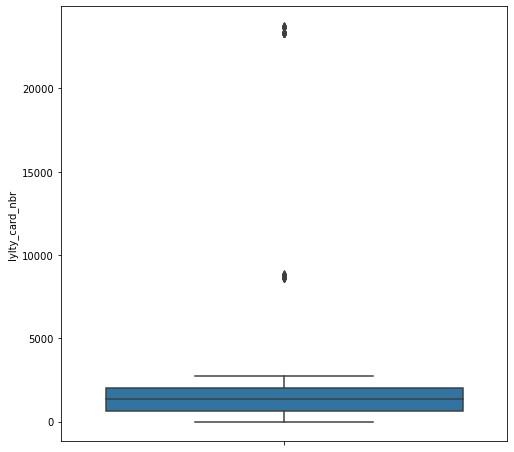

In [269]:
#yes can clearly ben seen theres some outliers here
plt.figure(figsize=(8,8))
sns.boxplot(y='lylty_card_nbr',data=purchase,)

In [270]:
#removed the outliers
purchase=purchase[purchase['lylty_card_nbr']<8000]

In [271]:
purchase.describe()

,lylty_card_nbr
count,72603.000000
mean,1353.141331
std,792.332298
min,10.000000
25%,661.910000
50%,1340.150000
75%,2033.495000
max,2723.920000


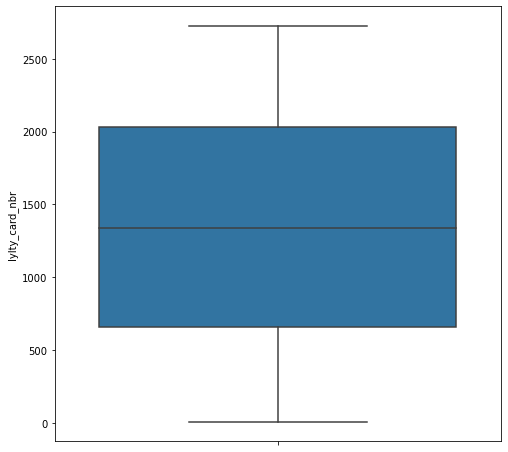

In [272]:
#looks better with the outliers removed
plt.figure(figsize=(8,8))
sns.boxplot(y='lylty_card_nbr',data=purchase,)

In [273]:
transaction.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,tot_sales
count,264835.000000,264835.000000,264835.000000,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1355.495841,1351.584116,56.583201,7.304205
std,105.389336,76.784306,805.801111,781.331563,32.826692,3.083231
min,43282.000000,1.000000,10.000000,0.010000,1.000000,1.500000
25%,43373.000000,70.000000,700.210000,676.010000,28.000000,5.400000
50%,43464.000000,130.000000,1303.580000,1351.380000,56.000000,7.400000
75%,43555.000000,203.000000,2030.945000,2027.015000,85.000000,9.200000
max,43646.000000,272.000000,23737.110000,24158.410000,114.000000,650.000000


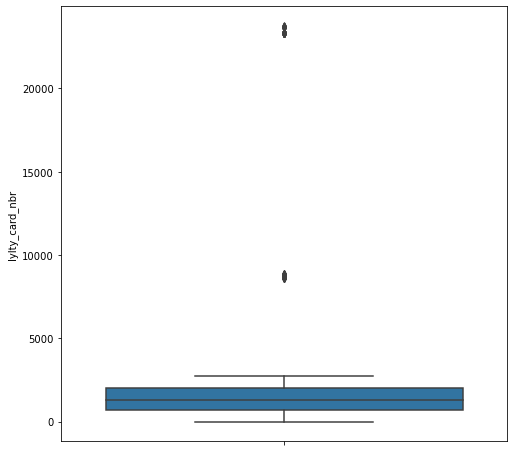

In [274]:
plt.figure(figsize=(8,8))
sns.boxplot(y='lylty_card_nbr',data=transaction)

In [275]:
transaction=transaction[transaction['lylty_card_nbr']<8000]

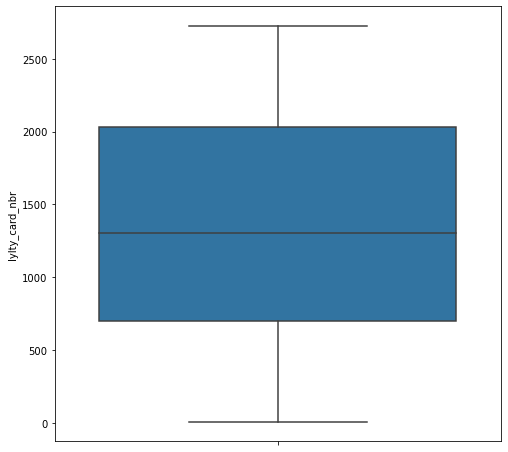

In [276]:
plt.figure(figsize=(8,8))
sns.boxplot(y='lylty_card_nbr',data=transaction)

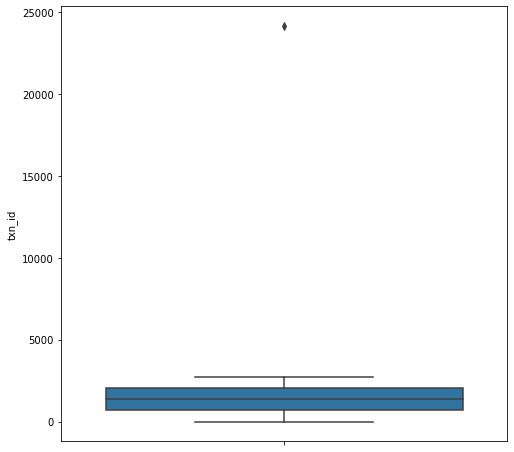

In [277]:
plt.figure(figsize=(8,8))
sns.boxplot(y='txn_id',data=transaction)

In [278]:
transaction=transaction[transaction['txn_id']<20000]

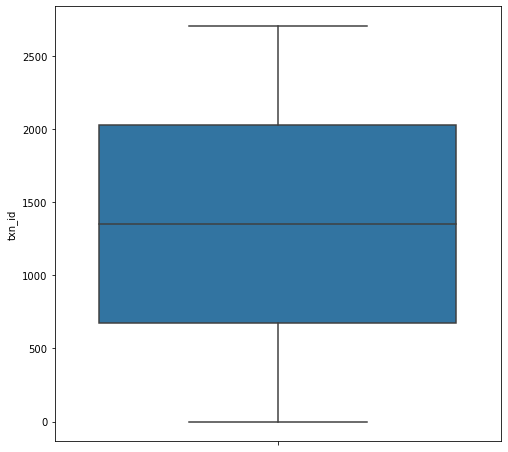

In [279]:
plt.figure(figsize=(8,8))
sns.boxplot(y='txn_id',data=transaction)

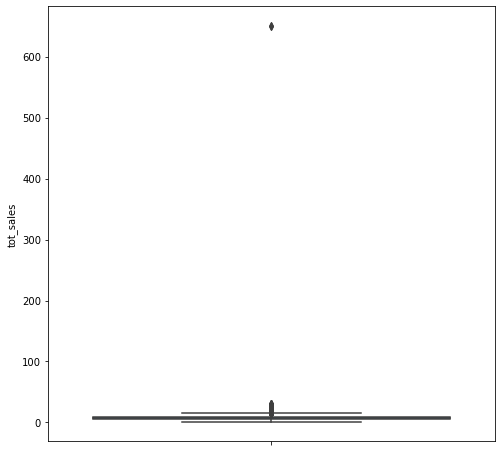

In [280]:
plt.figure(figsize=(8,8))
sns.boxplot(y='tot_sales',data=transaction)

In [281]:
transaction=transaction[transaction['tot_sales']<14]

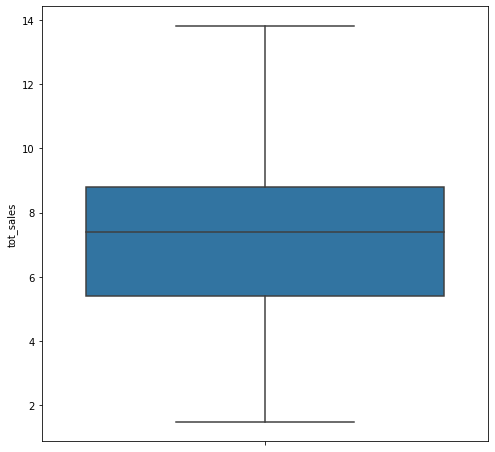

In [282]:
plt.figure(figsize=(8,8))
sns.boxplot(y='tot_sales',data=transaction)

### all the columns with outliers were visualized for proper identification and dealth with, since the data has a lot of rows, it was ok to remove the outliers

In [283]:
transaction.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,tot_sales
count,264141.000000,264141.000000,264141.000000,264141.000000,264141.000000,264141.000000
mean,43464.050200,135.075823,1352.468486,1351.329675,56.591215,7.270261
std,105.298404,76.788903,767.876337,780.076892,32.824409,2.453730
min,43282.000000,1.000000,10.000000,0.010000,1.000000,1.500000
25%,43373.000000,70.000000,700.170000,675.790000,28.000000,5.400000
50%,43464.000000,130.000000,1303.510000,1351.220000,56.000000,7.400000
75%,43555.000000,203.000000,2030.860000,2026.730000,85.000000,8.800000
max,43646.000000,272.000000,2723.920000,2702.090000,114.000000,13.800000


In [284]:
purchase.head(1)

,lylty_card_nbr,lifestage,premium_customer
0,10.0,YOUNG SINGLES/COUPLES,Premium


In [285]:
transaction.head(1)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,43390,1,10.0,0.01,5,Natural Chip Compny SeaSalt175g,2,6.0


In [286]:
#merged the two datasets into one
data=transaction.merge(purchase,how='inner',on='lylty_card_nbr')
data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
0,43390,1,10.00,0.01,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,13.07,3.48,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,13.07,3.46,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,13.07,3.47,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,13.43,3.83,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [287]:
#export cleaned data
data.to_csv('clean_data.csv')